In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd

In [117]:
y = np.random.randint(1,100,30)
# y = np.random.randn(1,100,10)

# Addition of Gaussians

In [23]:
ax.hist?

(array([  3.,  14.,  48., 155., 280., 249., 179.,  53.,  15.,   4.]),
 array([-3.69572954, -2.96009053, -2.22445151, -1.48881249, -0.75317347,
        -0.01753446,  0.71810456,  1.45374358,  2.1893826 ,  2.92502161,
         3.66066063]),
 <a list of 10 Patch objects>)

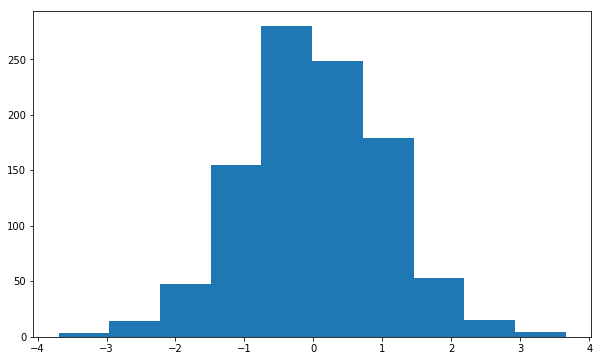

In [65]:
x = np.random.randn(1000)
fig, ax = plt.subplots(figsize = (10, 6))
ax.hist(x)

In [51]:
X = np.zeros((50,1000))

In [52]:
for i in range(X.shape[0]):
    X[i,:] = np.random.randn(X.shape[1])

In [67]:
np.mean(np.sum(X, axis=0))

0.058378702591046834

In [87]:
np.mean( np.sum(X, axis = 0)/np.sqrt(50.) )
# 0.008255995295800385

0.008255995295800385

In [88]:
np.var( np.sum(X, axis = 0)/np.sqrt(50.) )
# 1.0651741028214792

1.0651741028214792

$\Sigma X_i \rightarrow N(0,n\sigma)$

Therefore, $\frac{1}{\sqrt{n}} \Sigma X_i  \rightarrow N(0,\sigma)$,

$\sigma$ is 1 in our case.

# Bias Correction

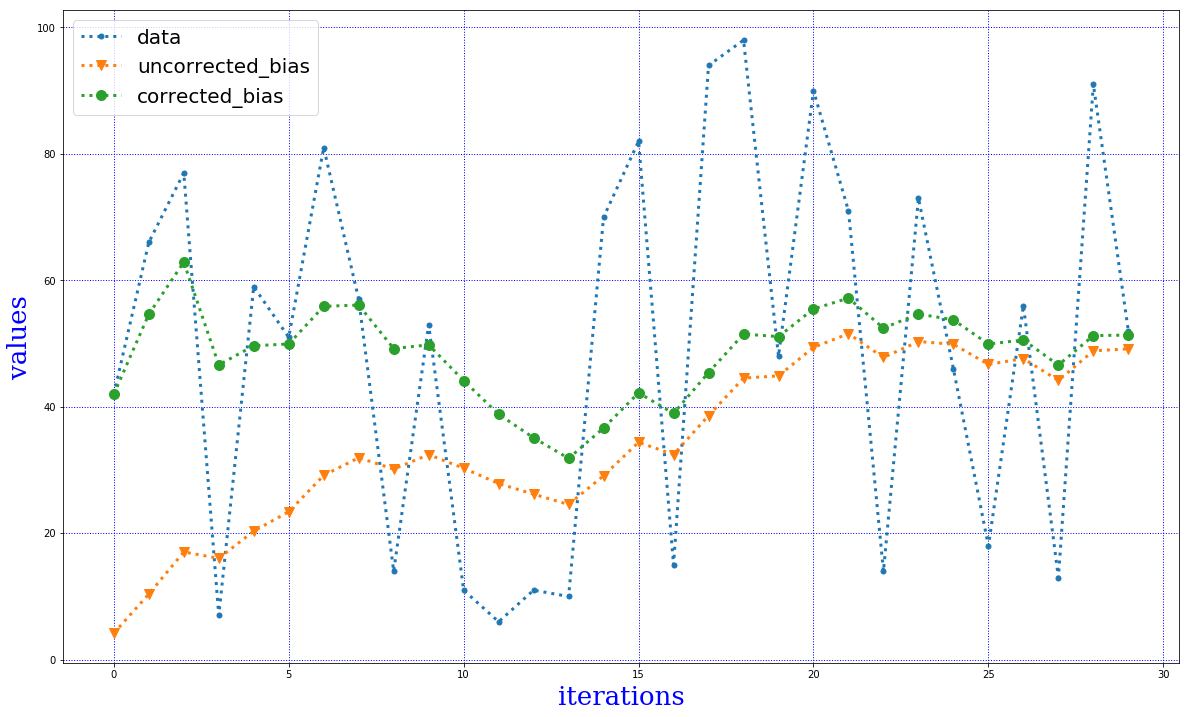

In [145]:
y = np.random.randint(1,100,30)
beta1 =  0.9
m = []
m_bias_corrected = []
m.append(0)
m_bias_corrected.append(0)

for idx, g in enumerate(y):
    val = beta1*m[idx] + (1-beta1)*g
    m.append(val)
    m_bias_corrected.append(val/(1 - beta1**(idx + 1)))
    
fig, ax = plt.subplots(figsize = (20, 12))
ax.plot(range(y.shape[0]), y, linestyle = ':', linewidth =3, marker = '.', label = 'data', markersize = 10)
ax.plot(range(y.shape[0]), m[1:], linestyle = ':', linewidth = 3, marker = 'v',  markersize = 10, label='uncorrected_bias')
ax.plot(range(y.shape[0]), m_bias_corrected[1:], linestyle = ':', linewidth = 3, marker = "o", markersize = 10, label='corrected_bias')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.grid(which='major', axis='both', linestyle=':', linewidth = 1, color='b')


ax.set_xlabel("iterations", labelpad=5, fontsize=26, fontname='serif', color="blue")
ax.set_ylabel("values", labelpad=5, fontsize=26, fontname='serif', color="blue")
ax.legend(prop={"size":20})

# Running Mean 

In [149]:
y

array([42, 66, 77,  7, 59, 51, 81, 57, 14, 53, 11,  6, 11, 10, 70, 82, 15,
       94, 98, 48, 90, 71, 14, 73, 46, 18, 56, 13, 91, 52])

In [146]:
# emv[i] = alpha * emv[i-1] + (1 - alpha) * y[i]
emvs = []
alphas = [0.18, 0.9, 0.99]
for alpha in alphas:
#     alpha = 0.9
    emv = []
    emv.append(0)
    for idx,_ in enumerate(y):
#         if idx == 0:
#             emv[idx] = y[idx]
#             continue
        emv.append((alpha) * emv[idx] + (1-alpha) * y[idx])
    emvs.append(emv)

In [147]:
# numbers = [1, 2, 3, 7, 9]
window_size = 10

numbers_series = pd.Series(y)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()

moving_averages_list = moving_averages.tolist()
without_nans = moving_averages_list[window_size - 1:]

print(without_nans)

[50.7, 47.6, 41.6, 35.0, 35.3, 36.4, 39.5, 32.9, 36.6, 45.0, 44.5, 52.4, 58.9, 59.2, 65.5, 63.1, 56.7, 60.8, 52.7, 52.0, 52.4]


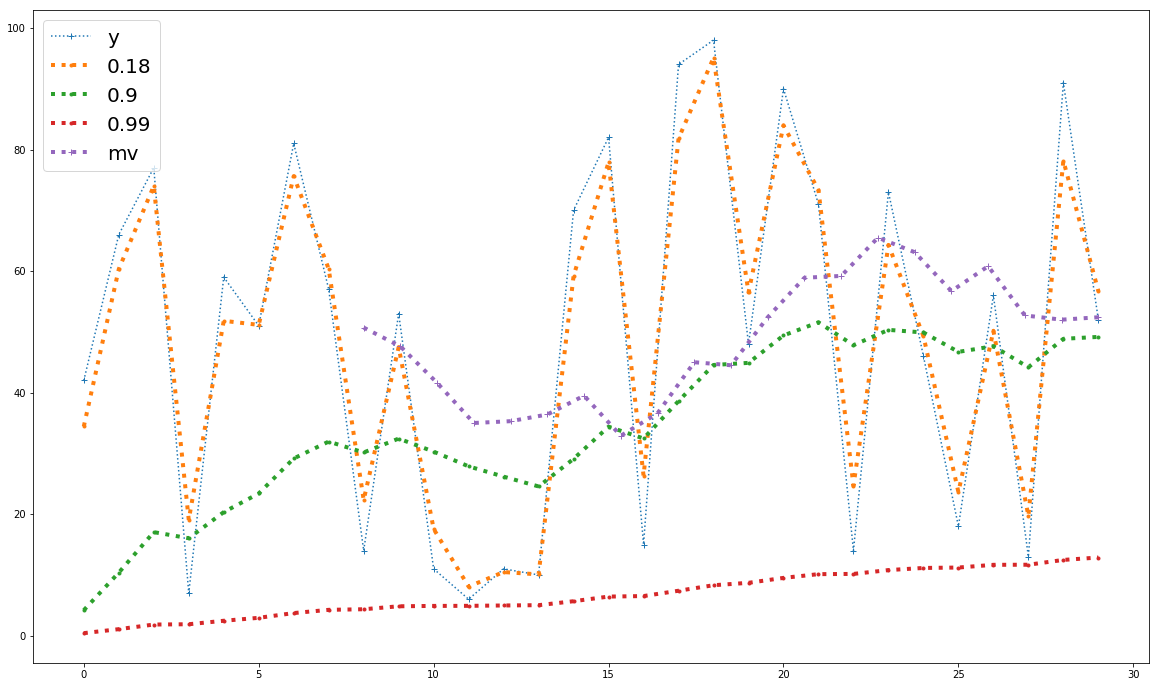

In [150]:
fig, ax = plt.subplots(figsize = (20, 12))
ax.plot(range(y.shape[0]), y, linestyle = ':', marker = '+', label = 'y')
for alpha, emv in zip(alphas, emvs):
    ax.plot(range(y.shape[0]), emv[1:], linestyle = ':', linewidth = 4, marker = '.', label = alpha)
ax.plot(np.linspace(0, y.shape[0] - window_size + 1, len(without_nans)) + window_size - 2, without_nans, linestyle = ':', linewidth = 4, marker = '+', label = 'mv')
ax.legend(prop={"size":20})

In [94]:
len(emv)

30

In [82]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])